<a href="https://colab.research.google.com/github/s-manterola/Earthquake/blob/main/Earthquake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from numpy import datetime64
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
filename = '/content/drive/MyDrive/Colab Notebooks/Bootcamp/Earthquake/Base de datos/database.csv'

df = pd.read_csv(filename)

In [4]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [5]:
df = df[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]
df.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       23412 non-null  object 
 1   Time       23412 non-null  object 
 2   Latitude   23412 non-null  float64
 3   Longitude  23412 non-null  float64
 4   Depth      23412 non-null  float64
 5   Magnitude  23412 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.1+ MB


In [7]:
while(True):
  try:
    pd.to_datetime(df['Date'], format='%m/%d/%Y')
  except ValueError as err:
    err = str(err)
    er = err[err.index("'")+1:err.index("'",err.index("'")+1)]

    corD = er[er.index('-')+1: er.index('-')+3] + "/" + er[er.index('-')+4: er.index('-')+6] + "/" + er[0:er.index('-')]
    corT = er[er.index('T')+1: er.index('Z')-4]

    df['Date'].replace(er, corD, inplace = True)
    df['Time'].replace(er, corT, inplace = True)
  else:
    break

df['DateTime'] = pd.to_datetime(df['Date'] + ','+ df['Time'],format='%m/%d/%Y,%H:%M:%S')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       23412 non-null  object        
 1   Time       23412 non-null  object        
 2   Latitude   23412 non-null  float64       
 3   Longitude  23412 non-null  float64       
 4   Depth      23412 non-null  float64       
 5   Magnitude  23412 non-null  float64       
 6   DateTime   23412 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 1.3+ MB


In [9]:
df.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude,DateTime
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0,1965-01-02 13:44:18
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8,1965-01-04 11:29:49
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2,1965-01-05 18:05:58
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8,1965-01-08 18:49:43
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8,1965-01-09 13:32:50


In [10]:
#Parametros a definir:
# Tiempo: tiempo desde el sismo en que se buscaran mas sismos (en segundos)
# Distancia: Distancia desde el sismo en que se buscaran mas sismos (en kilometros)

# Por ahora se definiran Tiempo: 864000s (10 dias), Distancia: 250km

Tiempo = 864000
Distancia = 250

In [11]:
df['Replicas'] = 0
df['Evento_Principal'] = 0

In [12]:
R = 6371 #Radio de la tierra en km

for i in range(df.shape[0]):
  df.iloc[i,8] = df.iloc[i,5]
  for j in range(i+1,df.shape[0]):
    if(i==j):
      continue
    d = math.acos(math.sin(math.radians(df.iloc[i,2]))*math.sin(math.radians(df.iloc[j,2]))+
                  math.cos(math.radians(df.iloc[i,2]))*math.cos(math.radians(df.iloc[j,2]))*
                  math.cos(math.radians(df.iloc[i,3]-df.iloc[j,3])))*R

    dt = (df.iloc[j,6]-df.iloc[i,6]).total_seconds()
    #print(dt)
    if (dt > Tiempo):
      break
    elif (d <= Distancia):
      df.iloc[i,7] = 1
      if df.iloc[i,8] < df.iloc[j,5]:
        df.iloc[i,8] = df.iloc[j,5]
      if df.iloc[i,8] > df.iloc[j,8]:
        df.iloc[j,8] = df.iloc[i,8]
  #print(f"Progreso: {i*10000/(df.shape[0]*100.0)}%")

In [13]:
df[df['Evento_Principal']==9.1]

,Date,Time,Latitude,Longitude,Depth,Magnitude,DateTime,Replicas,Evento_Principal
17083,12/26/2004,00:58:53,3.295,95.982,30.0,9.1,2004-12-26 00:58:53,1,9.1
20488,03/09/2011,02:45:20,38.435,142.842,32.0,7.3,2011-03-09 02:45:20,1,9.1
20489,03/09/2011,02:57:17,38.361,142.910,23.2,5.7,2011-03-09 02:57:17,1,9.1
20490,03/09/2011,02:58:14,38.246,143.102,35.0,5.7,2011-03-09 02:58:14,1,9.1
20491,03/09/2011,04:37:05,38.665,142.991,37.8,5.6,2011-03-09 04:37:05,1,9.1
20492,03/09/2011,18:16:16,38.315,142.434,22.0,6.0,2011-03-09 18:16:16,1,9.1
20493,03/09/2011,18:44:38,38.503,143.166,23.8,5.9,2011-03-09 18:44:38,1,9.1
20494,03/09/2011,21:22:18,38.345,142.648,23.0,6.0,2011-03-09 21:22:18,1,9.1
20495,03/09/2011,21:24:02,38.296,142.808,15.0,6.5,2011-03-09 21:24:02,1,9.1
20498,03/10/2011,08:08:21,38.603,143.270,17.4,5.6,2011-03-10 08:08:21,1,9.1


In [14]:
df.describe()

,Latitude,Longitude,Depth,Magnitude,Replicas,Evento_Principal
count,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000
mean,1.679033,39.639961,70.767911,5.882531,0.274774,5.973252
std,30.113183,125.511959,122.651898,0.423066,0.446410,0.486209
min,-77.080000,-179.997000,-1.100000,5.500000,0.000000,5.500000
25%,-18.653000,-76.349750,14.522500,5.600000,0.000000,5.600000
50%,-3.568500,103.982000,33.000000,5.700000,0.000000,5.800000
75%,26.190750,145.026250,54.000000,6.000000,1.000000,6.200000
max,86.005000,179.998000,700.000000,9.100000,1.000000,9.100000


In [15]:
print(f"Porcentaje de Sismos con Replicas con magnitud sobre 5.5: {100*df[df['Replicas'] !=0]['Date'].count()/df.shape[0]}%")

Porcentaje de Sismos con Replicas con magnitud sobre 5.5: 27.477362036562447%


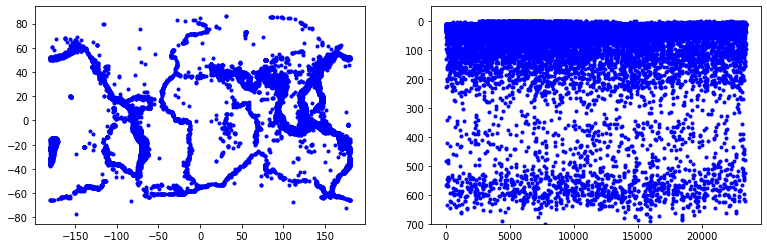

In [16]:
fig = plt.figure(figsize = (13,4))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(df['Longitude'], df['Latitude'], "b.")

ax2 = fig.add_subplot(1,2,2)
ax2.plot(df['Depth'], "b.")

ax2.set_ylim(max(df['Depth']), min(df['Depth']-50))

plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f180f2aa490>,
      dtype=object)

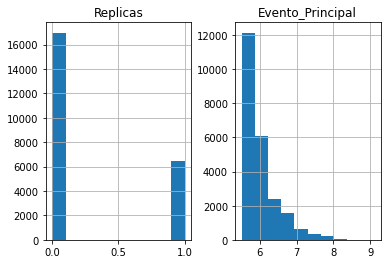

In [40]:
df[['Replicas', 'Evento_Principal']].hist()

In [17]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display='diagram') 

In [18]:
y = df['Replicas']
X = df.drop(['Replicas', 'Date', 'Time', 'DateTime'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Al imputar los datos, a estos ya se le habia separado la columna Outcome, que se 
# guardo en la variable 'y'. 

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

**Random Forest**

In [21]:
for i in range(50, 251, 50):
  rndf_clf = RandomForestClassifier(n_estimators=i, random_state = 42)

  rndf_pipeline = make_pipeline(scaler, rndf_clf)
  rndf_pipeline.fit(X_train, y_train)

  print(f"Score train Random Forest con {i} estimadores: {rndf_pipeline.score(X_train, y_train)*100}%")
  print(f"Score test Random Forest con {i} estimadores: {rndf_pipeline.score(X_test, y_test)*100}%")
  print("")

Score train Random Forest con 50 estimadores: 99.87185647925678%
Score test Random Forest con 50 estimadores: 86.22677770659834%

Score train Random Forest con 100 estimadores: 99.9893213732714%
Score test Random Forest con 100 estimadores: 86.24813153961136%

Score train Random Forest con 150 estimadores: 99.9946606866357%
Score test Random Forest con 150 estimadores: 86.26948537262439%

Score train Random Forest con 200 estimadores: 99.9946606866357%
Score test Random Forest con 200 estimadores: 86.35490070467648%

Score train Random Forest con 250 estimadores: 99.9946606866357%
Score test Random Forest con 250 estimadores: 86.48302370275465%



              precision    recall  f1-score   support

           0       0.88      0.95      0.91      3420
           1       0.82      0.63      0.72      1263

    accuracy                           0.86      4683
   macro avg       0.85      0.79      0.81      4683
weighted avg       0.86      0.86      0.86      4683



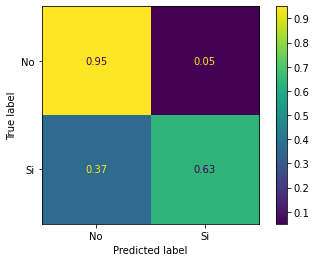

In [22]:
rndf_clf = RandomForestClassifier(n_estimators=250, random_state = 42)

rndf_pipeline = make_pipeline(scaler, rndf_clf)
rndf_pipeline.fit(X_train, y_train)

rndf_pre = rndf_pipeline.predict(X_test)
print(classification_report(y_test, rndf_pre))

cm = confusion_matrix(y_test, rndf_pre, labels=rndf_pipeline.classes_, normalize= 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['No', 'Si'])
disp.plot()
plt.show()

**Bagging Classifier**

In [24]:
for i in range(40, 121, 40):
  for j in range(50, 151, 50): 
    bag_clf = BaggingClassifier(
        DecisionTreeClassifier(), n_estimators = j,
        max_samples = i, bootstrap = True, #Si se quiere hacer pasting, esto es False
        random_state = 42)

    bag_pipeline = make_pipeline(scaler, bag_clf)
    bag_pipeline.fit(X_train, y_train)

    print(f"Score train Bagging Classifier con max_samples = {i} y n_estimators = {j}: {bag_pipeline.score(X_train, y_train)*100}%")
    print(f"Score test Bagging Classifier con max_samples = {i} y n_estimators = {j}: {bag_pipeline.score(X_test, y_test)*100}%")
    print("")

Score train Bagging Classifier con max_samples = 40 y n_estimators = 50: 81.65411928026056%
Score test Bagging Classifier con max_samples = 40 y n_estimators = 50: 81.84924193892805%

Score train Bagging Classifier con max_samples = 40 y n_estimators = 100: 81.55267232633884%
Score test Bagging Classifier con max_samples = 40 y n_estimators = 100: 81.80653427290198%

Score train Bagging Classifier con max_samples = 40 y n_estimators = 150: 81.64877996689626%
Score test Bagging Classifier con max_samples = 40 y n_estimators = 150: 81.52893444373265%

Score train Bagging Classifier con max_samples = 80 y n_estimators = 50: 84.01943510064605%
Score test Bagging Classifier con max_samples = 80 y n_estimators = 50: 84.24087123638692%

Score train Bagging Classifier con max_samples = 80 y n_estimators = 100: 84.29174008222543%
Score test Bagging Classifier con max_samples = 80 y n_estimators = 100: 84.30493273542601%

Score train Bagging Classifier con max_samples = 80 y n_estimators = 150: 

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      3420
           1       0.84      0.52      0.64      1263

    accuracy                           0.84      4683
   macro avg       0.84      0.74      0.77      4683
weighted avg       0.84      0.84      0.83      4683



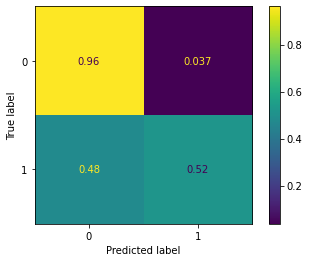

In [25]:
bag_clf = BaggingClassifier(
DecisionTreeClassifier(), n_estimators = 100,
        max_samples = 80, bootstrap = True, #Si se quiere hacer pasting, esto es False
        random_state = 42)

bag_pipeline = make_pipeline(scaler, bag_clf)
bag_pipeline.fit(X_train, y_train)

bag_pre = bag_pipeline.predict(X_test)
print(classification_report(y_test, bag_pre))

cm = confusion_matrix(y_test, bag_pre, labels=bag_pipeline.classes_, normalize= 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=bag_pipeline.classes_)
disp.plot()
plt.show()

**Logistic Regression**

Score train Logistic Regression: 88.01324149714347%
Score test Logistic Regression: 87.7642536835362%
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      3420
           1       0.92      0.60      0.72      1263

    accuracy                           0.88      4683
   macro avg       0.90      0.79      0.82      4683
weighted avg       0.88      0.88      0.87      4683



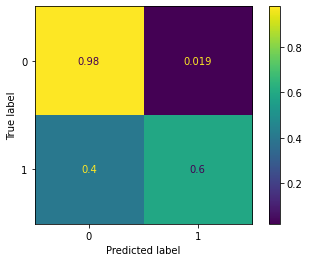

In [26]:
log_reg = LogisticRegression(solver='liblinear',
                            multi_class='ovr')

log_pipeline = make_pipeline(scaler, log_reg)
log_pipeline.fit(X_train, y_train)

print(f"Score train Logistic Regression: {log_pipeline.score(X_train, y_train)*100}%")
print(f"Score test Logistic Regression: {log_pipeline.score(X_test, y_test)*100}%")

log_pre = log_pipeline.predict(X_test)
print(classification_report(y_test, log_pre))

cm = confusion_matrix(y_test, log_pre, labels=log_pipeline.classes_, normalize= 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=log_pipeline.classes_)
disp.plot()
plt.show()

**Red Neuronal Sencilla**

In [27]:
scaler = StandardScaler()

X = pd.DataFrame(df.drop(['Replicas', 'Date', 'Time', 'DateTime'], axis = 1))
y = df['Replicas']

X = scaler.fit_transform(X)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
import tensorflow as tf

In [30]:
# Armado de nuestra red neuronal
model = tf.keras.models.Sequential() # Modelo secuencial
model.add(tf.keras.layers.InputLayer(input_shape=(5,))) # Capa Input
model.add(tf.keras.layers.Dense(1250, activation='relu')) # Primera capa oculta, salida 300
model.add(tf.keras.layers.Dense(600, activation='relu')) # Segunda capa oculta, salida 100
model.add(tf.keras.layers.Dense(300, activation='relu')) # Segunda capa oculta, salida 100
model.add(tf.keras.layers.Dense(200, activation='relu')) # Segunda capa oculta, salida 100
model.add(tf.keras.layers.Dense(75, activation='relu')) # Segunda capa oculta, salida 100
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) # Capa de salida, salida 10 (número de clases)


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1250)              7500      
                                                                 
 dense_1 (Dense)             (None, 600)               750600    
                                                                 
 dense_2 (Dense)             (None, 300)               180300    
                                                                 
 dense_3 (Dense)             (None, 200)               60200     
                                                                 
 dense_4 (Dense)             (None, 75)                15075     
                                                                 
 dense_5 (Dense)             (None, 1)                 76        
                                                                 
Total params: 1,013,751
Trainable params: 1,013,751
Non-

In [32]:

model.compile(loss="bce",
              optimizer="sgd",
              metrics=["accuracy"])


In [33]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, 
                                                  stratify=y_train)

In [34]:
history = model.fit(X_train, y_train, epochs=250, batch_size=3000, 
                    validation_data=(X_val, y_val))

Epoch 1/250
5/5 [==============================] - 5s 790ms/step - loss: 0.7008 - accuracy: 0.2738 - val_loss: 0.6958 - val_accuracy: 0.3820
Epoch 2/250
5/5 [==============================] - 3s 671ms/step - loss: 0.6933 - accuracy: 0.5408 - val_loss: 0.6887 - val_accuracy: 0.6821
Epoch 3/250
5/5 [==============================] - 3s 666ms/step - loss: 0.6864 - accuracy: 0.6900 - val_loss: 0.6824 - val_accuracy: 0.7258
Epoch 4/250
5/5 [==============================] - 3s 717ms/step - loss: 0.6803 - accuracy: 0.7286 - val_loss: 0.6765 - val_accuracy: 0.7272
Epoch 5/250
5/5 [==============================] - 4s 777ms/step - loss: 0.6746 - accuracy: 0.7289 - val_loss: 0.6711 - val_accuracy: 0.7261
Epoch 6/250
5/5 [==============================] - 2s 376ms/step - loss: 0.6693 - accuracy: 0.7260 - val_loss: 0.6660 - val_accuracy: 0.7240
Epoch 7/250
5/5 [==============================] - 2s 373ms/step - loss: 0.6643 - accuracy: 0.7251 - val_loss: 0.6612 - val_accuracy: 0.7240
Epoch 8/250
5

In [35]:

score, acc = model.evaluate(X_test, y_test,
                            batch_size=32)
print("Score:", score) # Función de pérdida
print("Accuracy:", acc)

147/147 [==============================] - 1s 4ms/step - loss: 0.3685 - accuracy: 0.8527
Score: 0.36853933334350586
Accuracy: 0.8526585698127747


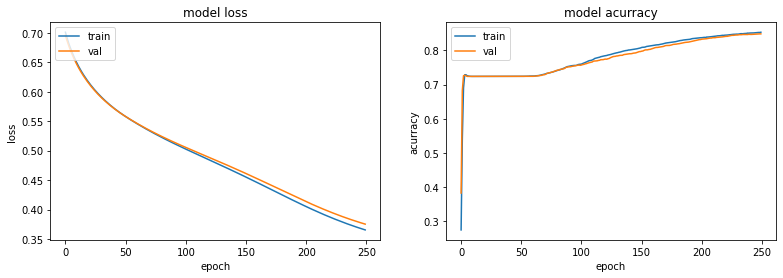

In [36]:
fig = plt.figure(figsize = (13,4))
ax1 = fig.add_subplot(1,2,1)

ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('model loss')
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'val'], loc='upper left')

ax2 = fig.add_subplot(1,2,2)
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.set_title('model acurracy')
ax2.set_ylabel('acurracy')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'val'], loc='upper left')

In [37]:
pro_pre = model.predict(X_test) 
pre=np.round(pro_pre)

              precision    recall  f1-score   support

           0       0.84      0.98      0.91      3420
           1       0.90      0.51      0.65      1263

    accuracy                           0.85      4683
   macro avg       0.87      0.74      0.78      4683
weighted avg       0.86      0.85      0.84      4683



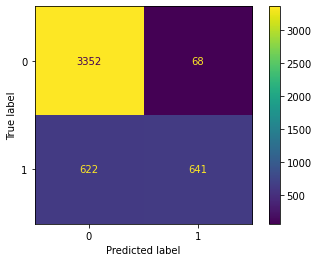

In [42]:
print(classification_report(y_test, pre))

cm = confusion_matrix(y_test, pre)#, normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

**Resumen**

Tanto la red neuronal como logistical regression predicen extremadamente pocas veces que va a ocurrir un sismo despues de que ocurrio otro. Ambos entregan una probabilidad de que ocurra. Bagging Classifiers predice correctamente 20% de los casos en que hay un sismo dentro de los rangos de otro sismo. Por otra parte, Random Forest logra acertar en 40% de los casos. 